**NAME:** KAMRAN ANSARI

**REG NO:** 22MCA0223

#Question 1


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.python import data

##Three Input AND Gate

In [ ]:
X1 = tf.Variable(initial_value=[0.,0.,0.,0.,1.,1.,1.,1.])
X2 = tf.Variable(initial_value=[0.,0.,1.,1.,0.,0.,1.,1.])
X3 = tf.Variable(initial_value=[0.,1.,0.,1.,0.,1.,0.,1.])

Y_3AND = tf.Variable(initial_value=[0.,0.,0.,0.,0.,0.,0.,1.])

In [ ]:
class Model(object):

   def __init__(self):
        self.W1 = tf.Variable(initial_value=tf.random.normal([1]))
        self.W2 = tf.Variable(initial_value=tf.random.normal([1]))
        self.W3 = tf.Variable(initial_value=tf.random.normal([1]))
        self.b = tf.Variable(initial_value=tf.random.normal([1]))

   def __call__(self, x1,x2,x3):
        self.K1 = self.W1 * x1 + self.W2 * x2 + self.W3 * x3 + self.b
        self.Output = tf.keras.activations.sigmoid(self.K1)
        return(self.Output)

model = Model()

In [ ]:
def compute_cost(target_y, predicted_y):
    c=tf.keras.losses.BinaryCrossentropy()
    return(c(target_y,predicted_y))

def None_to_Zero(v):
  ret = []

  for e in v:
    if e == None:
        ret.append(0)
    else:
      ret.append(e)

  return tuple(ret)

In [ ]:
def train(model, X1, X2, X3, Y2, learning_rate):
    with tf.GradientTape() as t:
            current_loss = compute_cost(Y2,model(X1,X2,X3))
    dW1, dW2, dW3, db = None_to_Zero(t.gradient(current_loss,[model.W1,model.W2,model.W3,model.b]))

    model.W1.assign_sub(learning_rate * dW1)
    model.W2.assign_sub(learning_rate * dW2)
    model.W3.assign_sub(learning_rate * dW3)
    model.b.assign_sub(learning_rate * db)

In [ ]:
epochs = range(1000)

learning_rate = 0.1

for epoch in epochs:
    train(model, X1, X2, X3, Y_3AND, learning_rate)

print(np.round(model(X1, X2, X3).numpy()))

[0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
W_3AND = {'W1':model.W1.numpy(),'W2':model.W2.numpy(),'W3':model.W3.numpy(),'b':model.b.numpy()}
W_3AND

{'W1': array([2.9475274], dtype=float32),
 'W2': array([2.946202], dtype=float32),
 'W3': array([2.9462547], dtype=float32),
 'b': array([-7.9043264], dtype=float32)}

##NAND

In [ ]:
X1=tf.Variable(initial_value=[0.,1.,0.,1.])
X2=tf.Variable(initial_value=[0.,0.,1.,1.])

Y_NAND=tf.Variable(initial_value=[1.,1.,1.,0.])

In [ ]:
class Model(object):

   def __init__(self):
        self.W1 = tf.Variable(2.)
        self.W2 = tf.Variable(2.)
        self.b = tf.Variable(2.)

   def __call__(self, x1,x2):
        self.K1 = self.W1 * x1 + self.W2 * x2 + self.b
        self.Output = tf.keras.activations.sigmoid(self.K1)
        return(self.Output)

model = Model()

In [ ]:
def train(model, X1, X2, Y2, learning_rate):
    with tf.GradientTape() as t:
            current_loss = compute_cost(Y2,model(X1,X2))
    dW1,dW2,db = None_to_Zero(t.gradient(current_loss,[model.W1,model.W2,model.b]))

    model.W1.assign_sub(learning_rate * dW1)
    model.W2.assign_sub(learning_rate * dW2)
    model.b.assign_sub(learning_rate * db)

In [ ]:
epochs = range(1000)

learning_rate=0.1

for epoch in epochs:
    train(model, X1, X2,Y_NAND, learning_rate)

print(np.round(model(X1, X2).numpy()))

[1. 1. 1. 0.]


In [ ]:
W_NAND={'W1':model.W1.numpy(),'W2':model.W2.numpy(),'b':model.b.numpy()}
W_NAND

{'W1': -2.9350576, 'W2': -2.9350576, 'b': 4.623217}

#Question 2


In [ ]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Data file path
FILE_PATH = '/content/penguins.csv'

# Dataframe from csv file
data = pd.read_csv(FILE_PATH)

##Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
data = data.dropna()
data = data[data['sex'] != '.']

##Preparing dataset

In [ ]:
one_hot_encoded = pd.get_dummies(data[['sex', 'island']])
data.drop(['island', 'sex'], axis=1, inplace=True)
data = pd.concat([data, one_hot_encoded], axis=1)
data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,1,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [ ]:
X = data.loc[:,data.columns != 'species']
y = data.loc[:,['species']]

In [ ]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [ ]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")

Train shape : (233, 9), Y Train : (233, 3)


In [ ]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])
    return model

In [ ]:
model = get_model()

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 500)               5000      
                                                                 
 dense_23 (Dense)            (None, 100)               50100     
                                                                 
 dense_24 (Dense)            (None, 20)                2020      
                                                                 
 dense_25 (Dense)            (None, 3)                 63        
                                                                 
Total params: 57,219
Trainable params: 57,201
Non-trainable params: 18
_________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 40ms/step - loss: 0.8830 - accuracy: 0.7425 - val_loss: 5.0820 - val_accuracy: 0.3000
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.4617 - accuracy: 0.8712 - val_loss: 11.1979 - val_accuracy: 0.3000
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1871 - accuracy: 0.9957 - val_loss: 13.7628 - val_accuracy: 0.3000
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0773 - accuracy: 0.9957 - val_loss: 13.8499 - val_accuracy: 0.3000
Epoch 5/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.9957 - val_loss: 10.1319 - val_accuracy: 0.3000
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0317 - accuracy: 0.9957 - val_loss: 9.3841 - val_accuracy: 0.3000
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 8.3189 - val_accuracy: 0.3000
Epoch 8/30
8/8 [===========

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1398 - accuracy: 0.9600


[0.13977031409740448, 0.9599999785423279]

## Performance Monitor

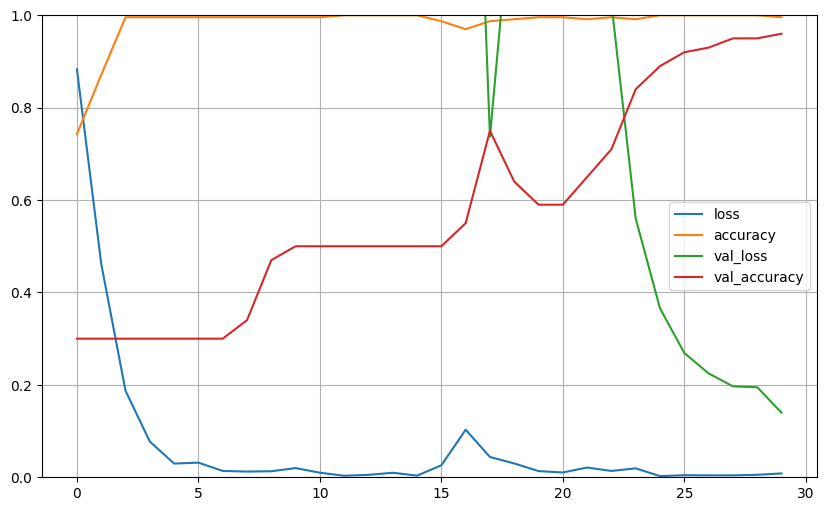

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()